In [1]:
# Imports
from env import host, user, password
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import explore as e

np.random.seed(42)

In [2]:
df = w.wrangle_zillow()
train, validate, test = w.split_function(df)
to_scale = ['bathrooms', 'bedrooms', 'squarefeet', 'lotsize_sqft', 'year']
train_scaled, validate_scaled, test_scaled = w.get_minmax_scaled(train, validate, test, to_scale)

csv file found and read
Prepared df: (47949, 10)

Train: (28769, 10)
Validate: (9590, 10)
Test: (9590, 10)


In [3]:
train.head()

,property_value,bathrooms,bedrooms,has_pool,squarefeet,lotsize_sqft,year,county,county_Orange,county_Ventura
46866,476000,2.0,3,0,1606,6447,1955,LA,0,0
43125,567337,2.5,4,1,2642,7912,1977,Orange,1,0
38231,419390,1.0,2,0,924,7155,1948,LA,0,0
20644,409000,1.0,3,0,1402,7165,1953,LA,0,0
46076,342514,3.0,4,0,2826,23650,1978,Orange,1,0


# Initial visualizations of features vs target

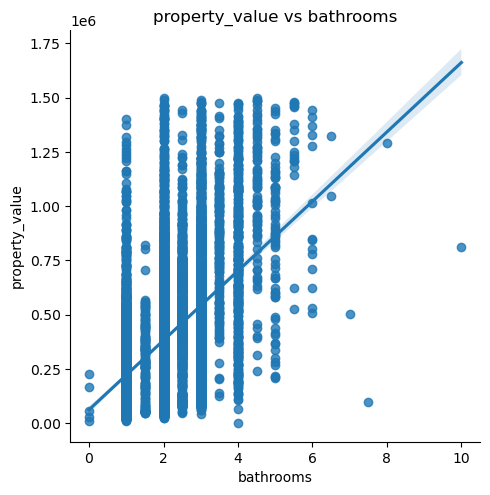

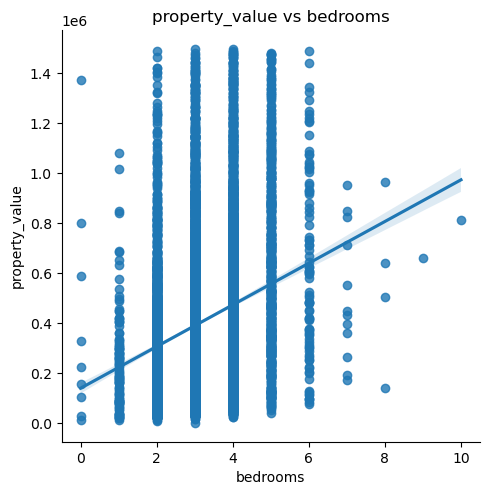

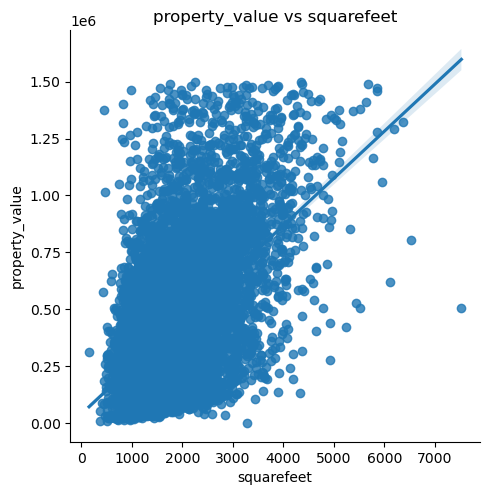

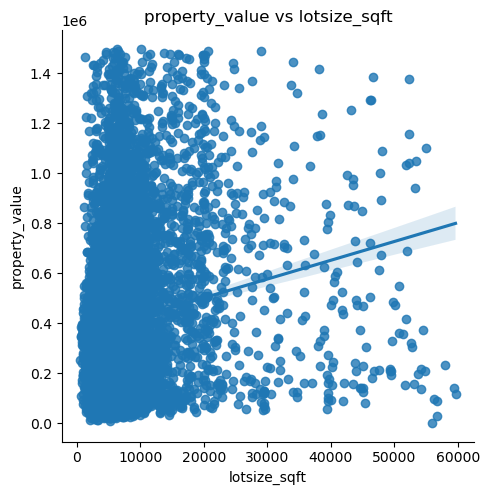

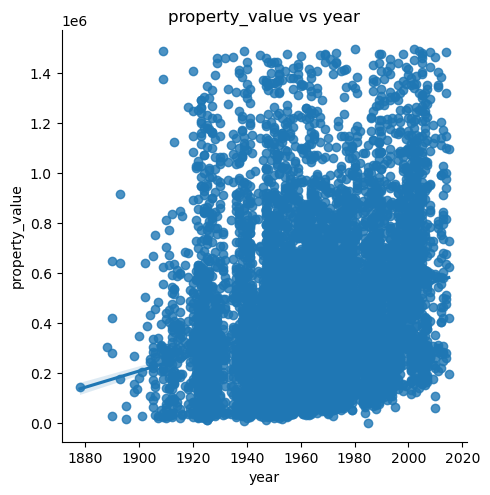

In [4]:
cont_cols = ['bathrooms', 'bedrooms', 'squarefeet', 'lotsize_sqft', 'year', 'property_value']
cat_cols = ['has_pool', 'county']
e.plot_variable_pairs(train, cont_cols)

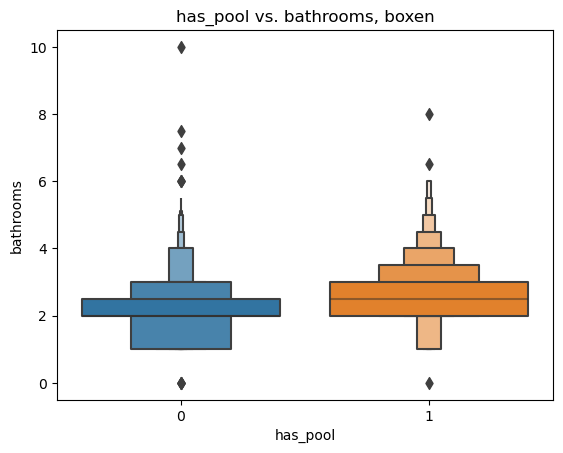

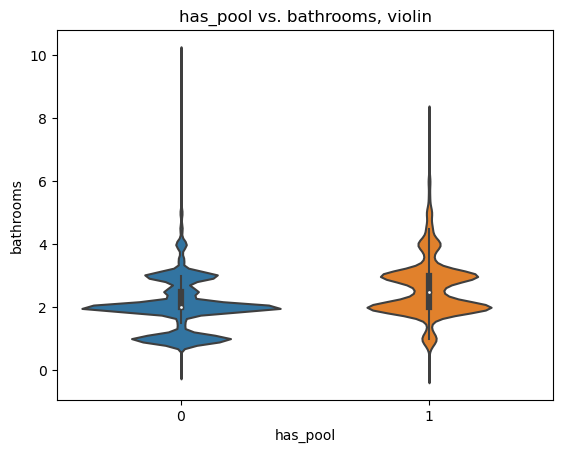

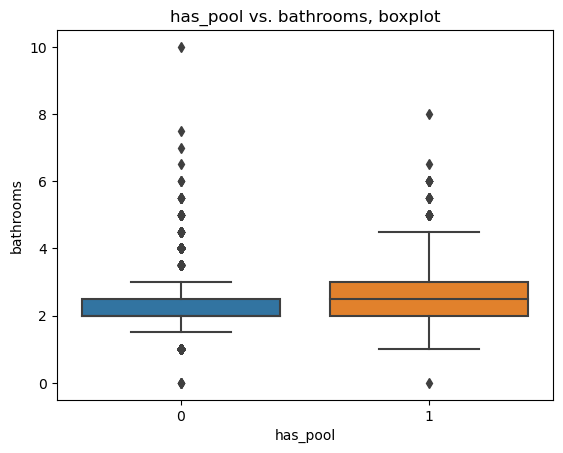

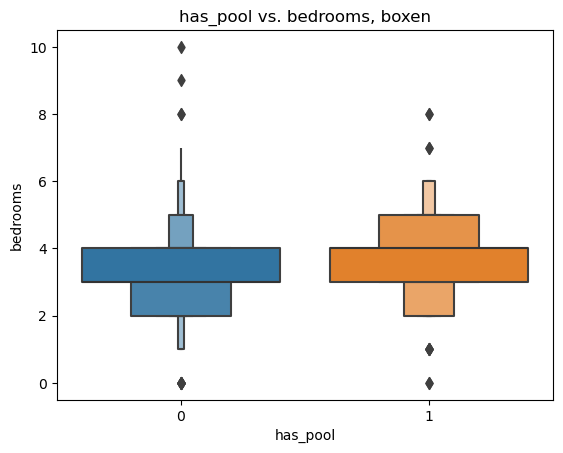

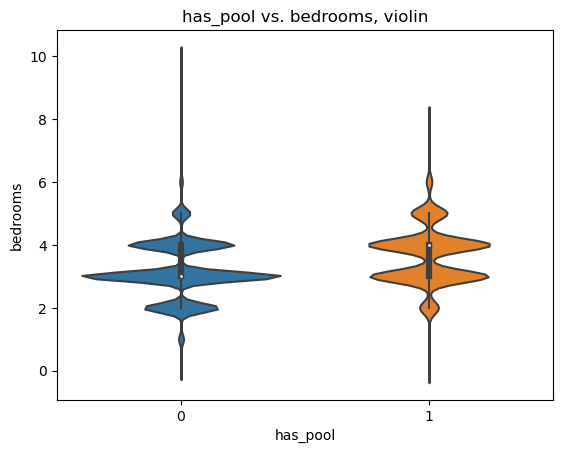

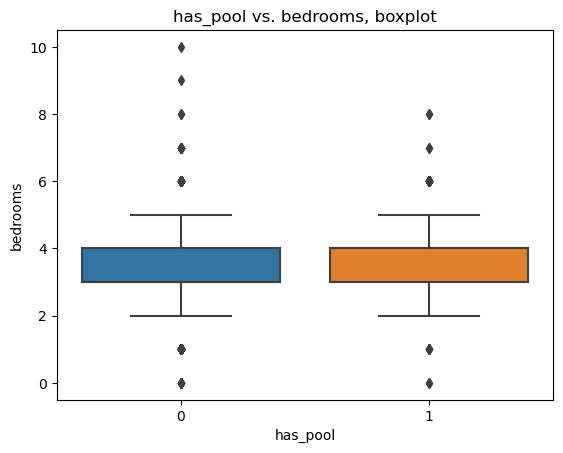

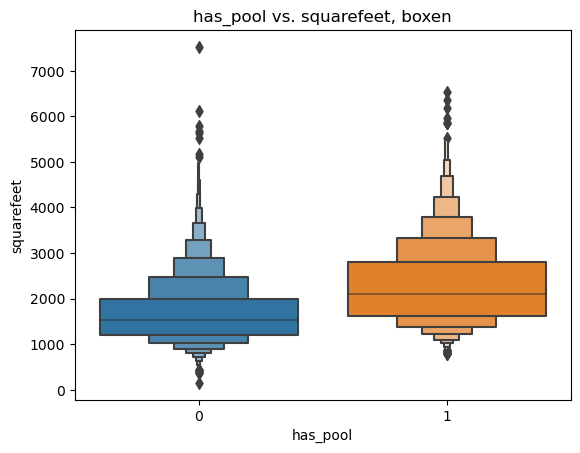

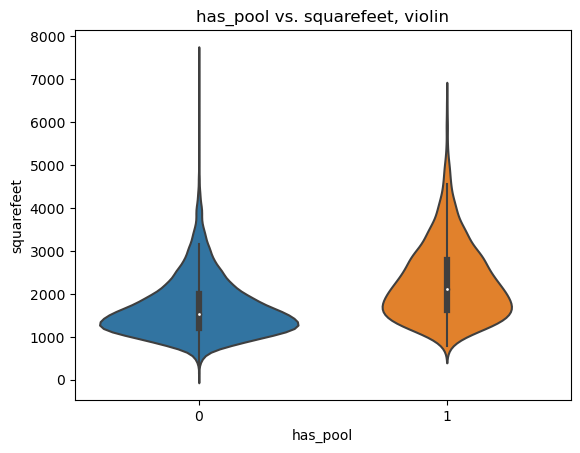

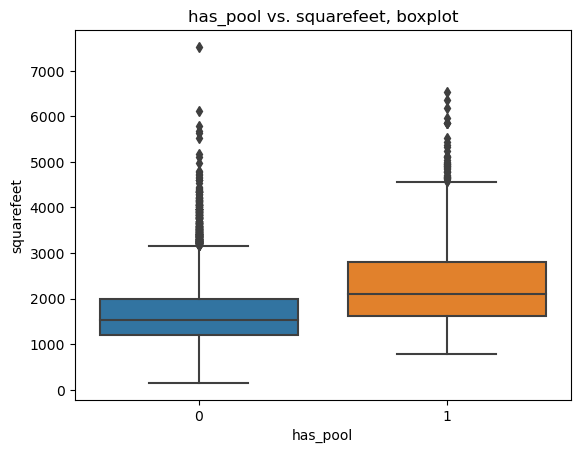

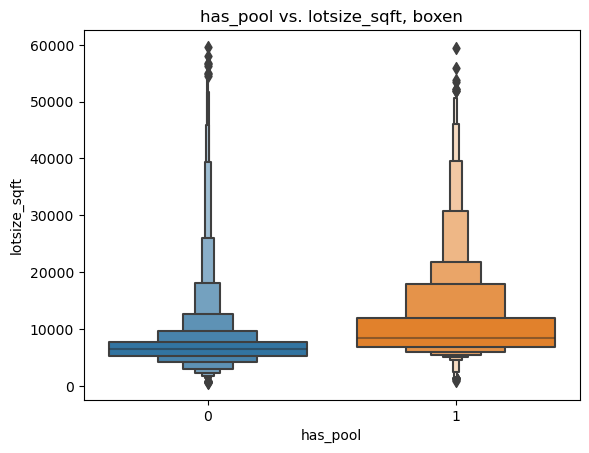

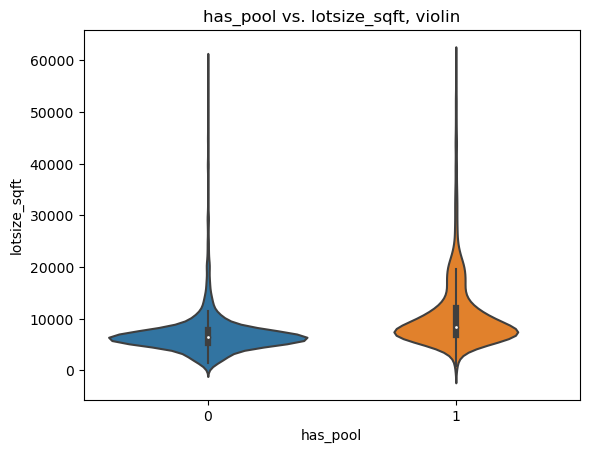

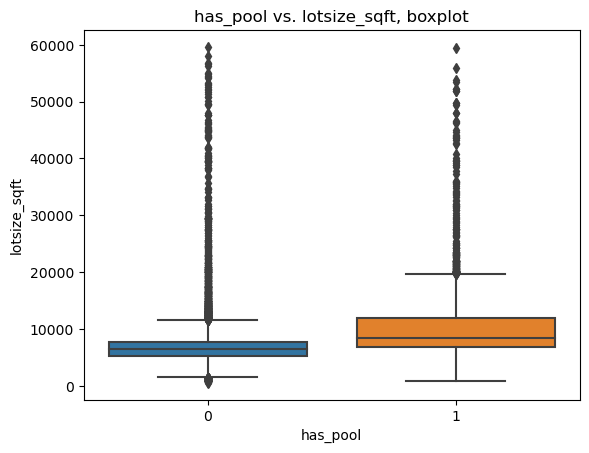

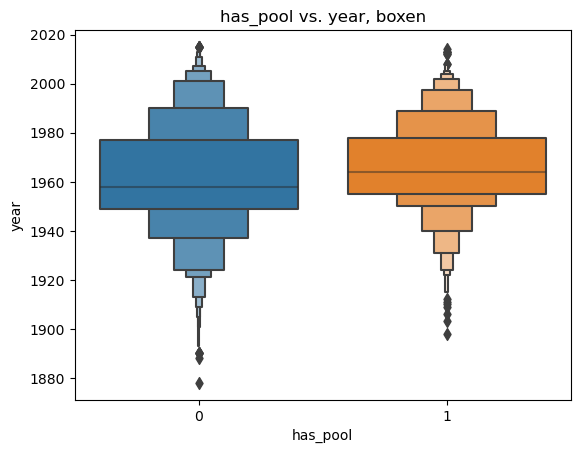

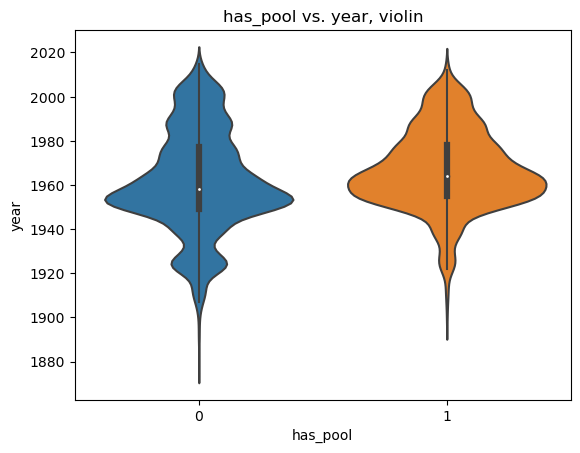

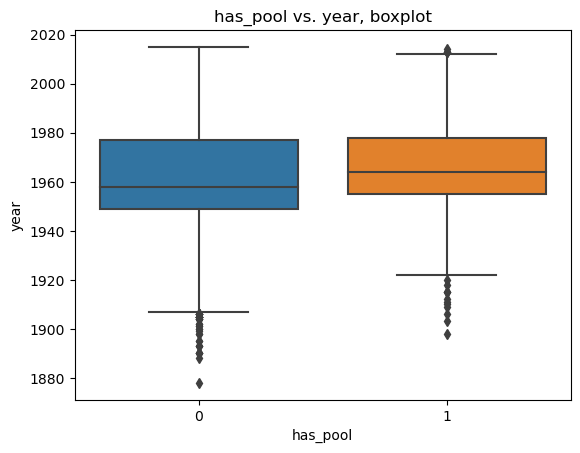

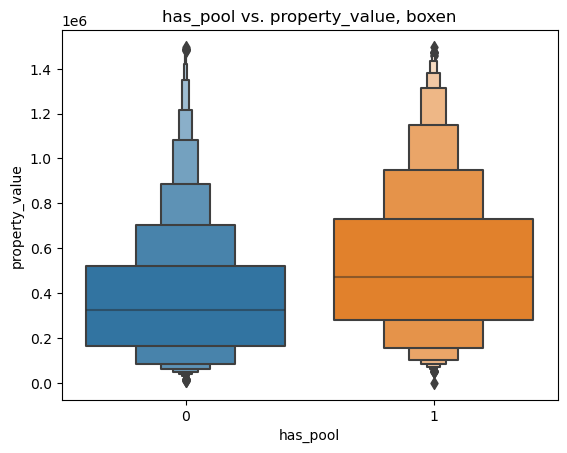

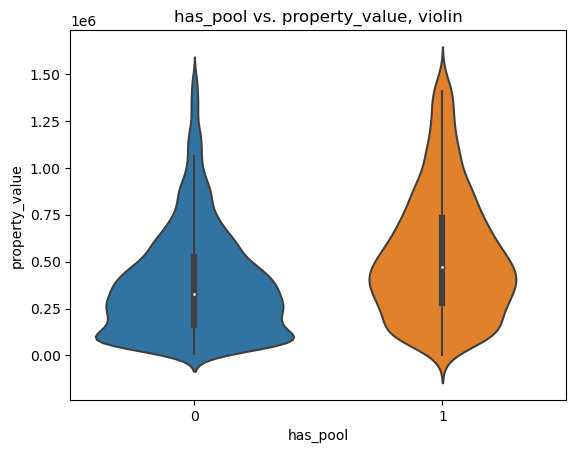

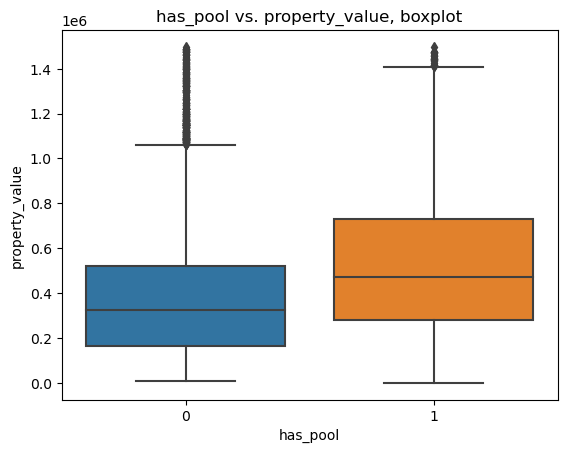

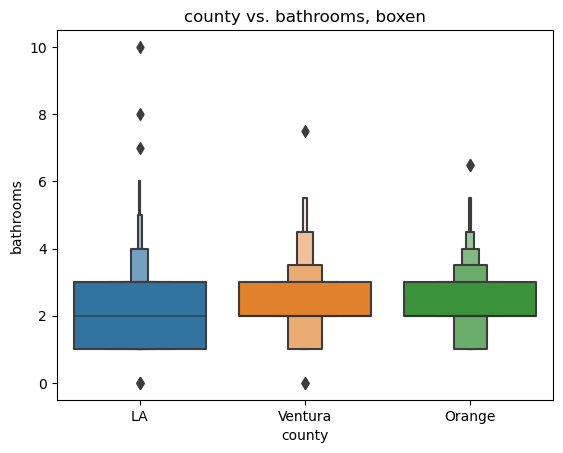

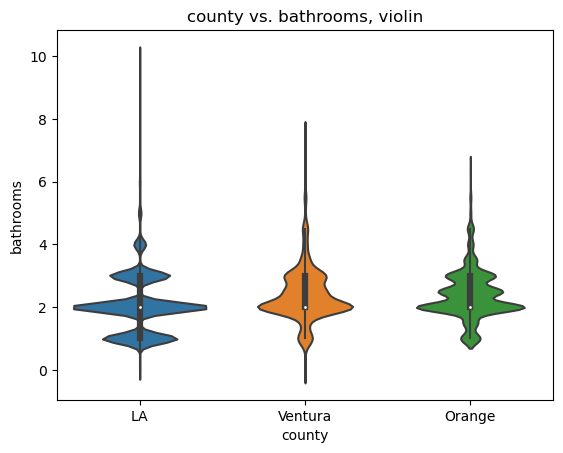

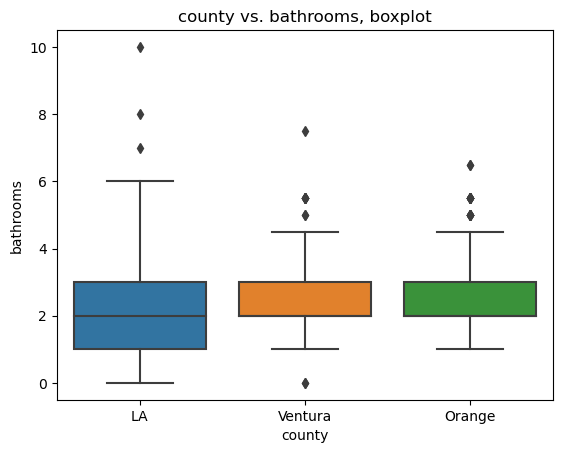

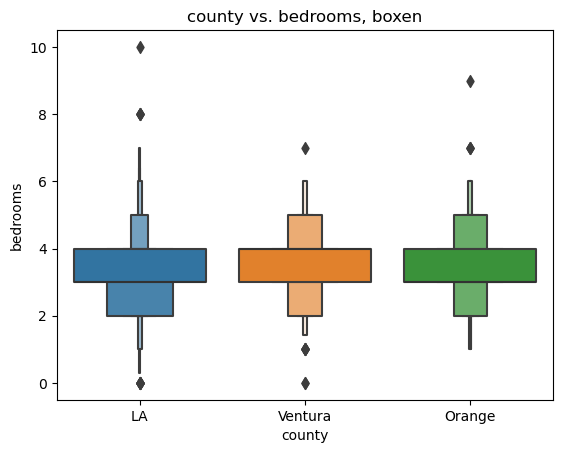

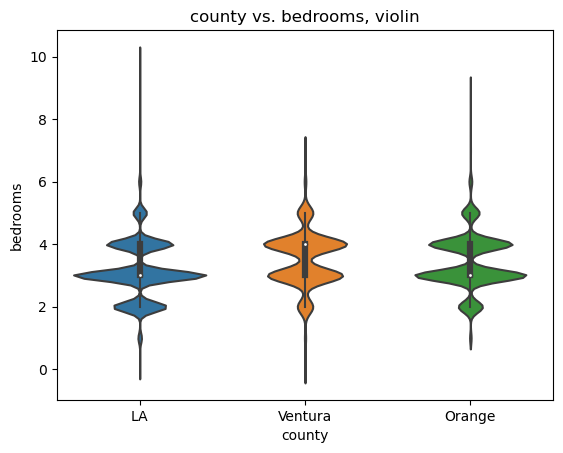

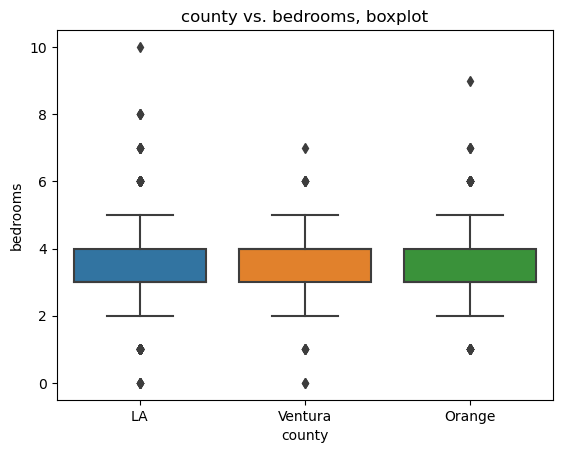

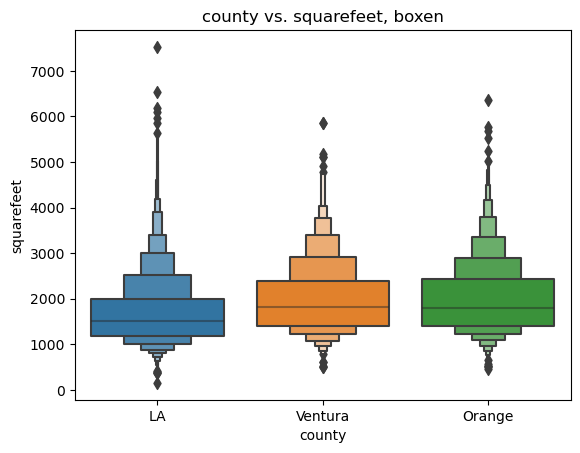

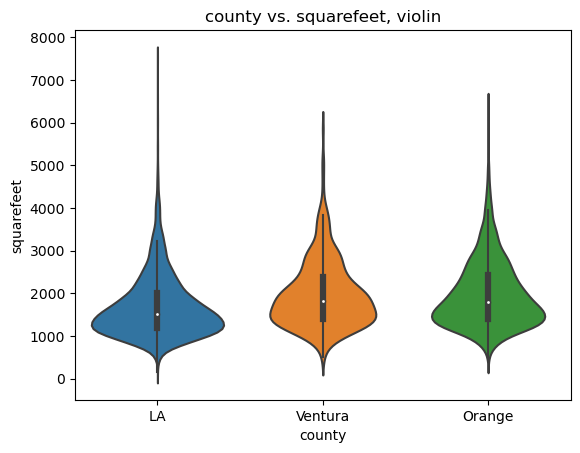

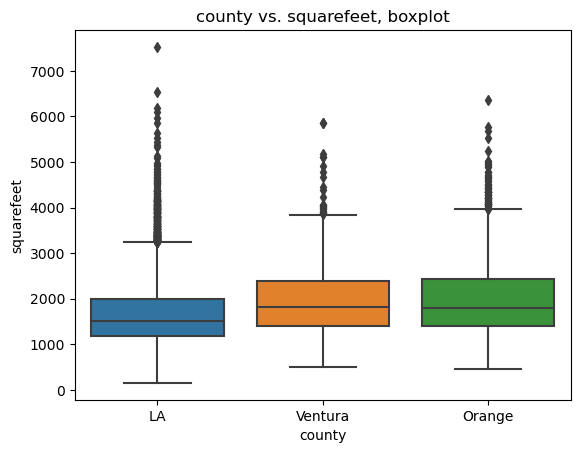

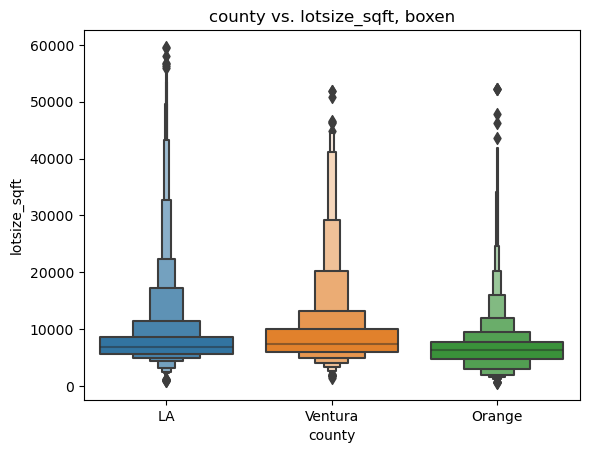

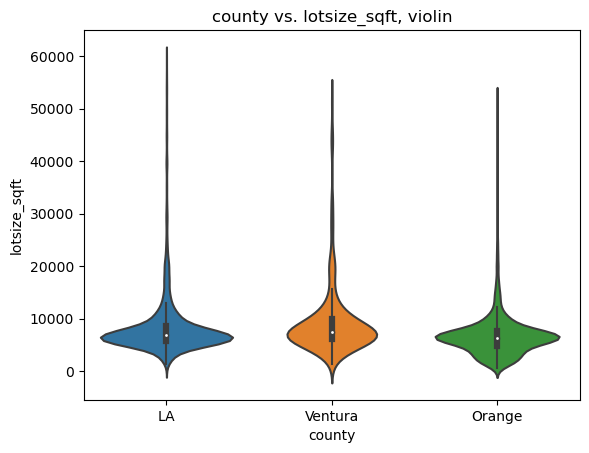

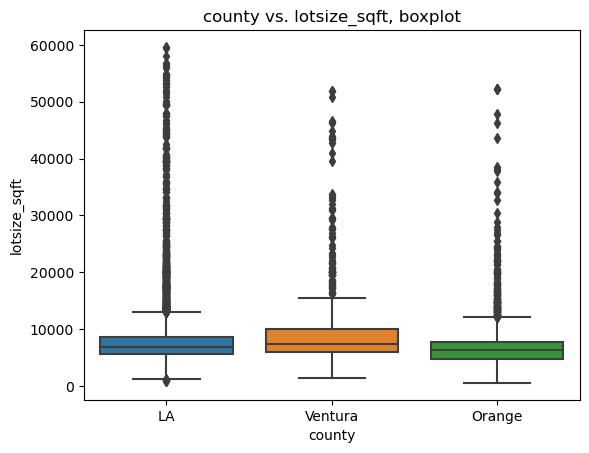

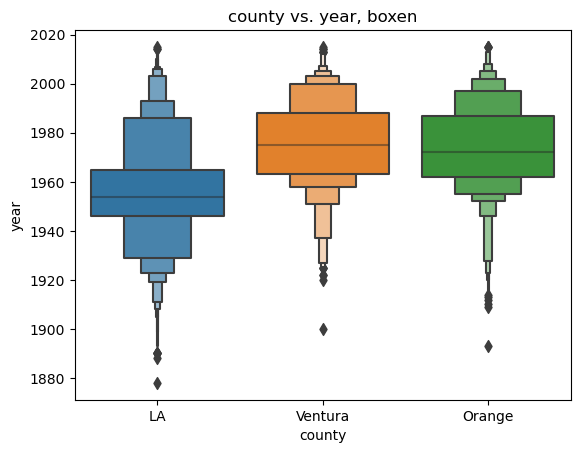

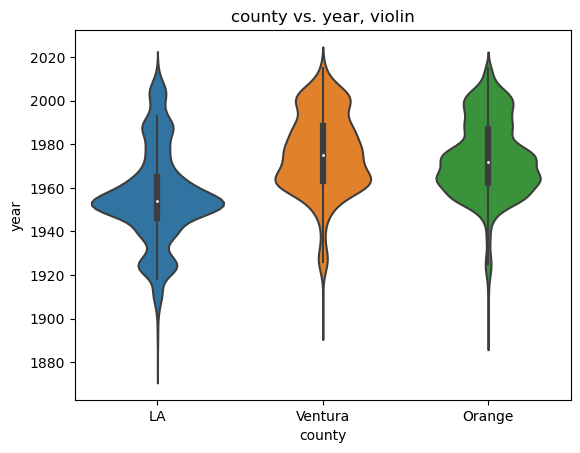

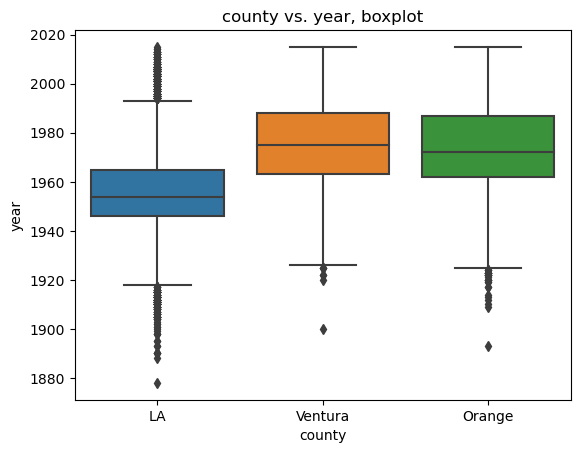

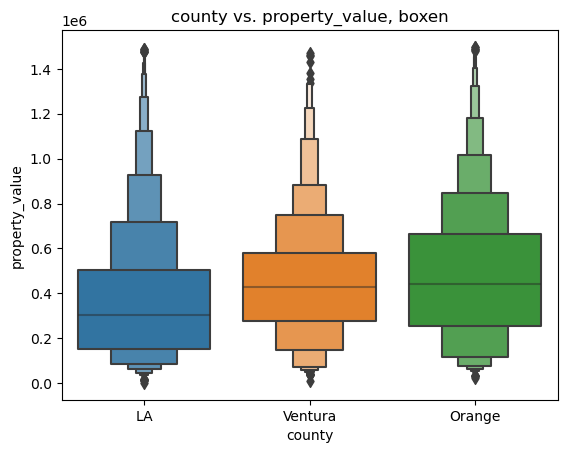

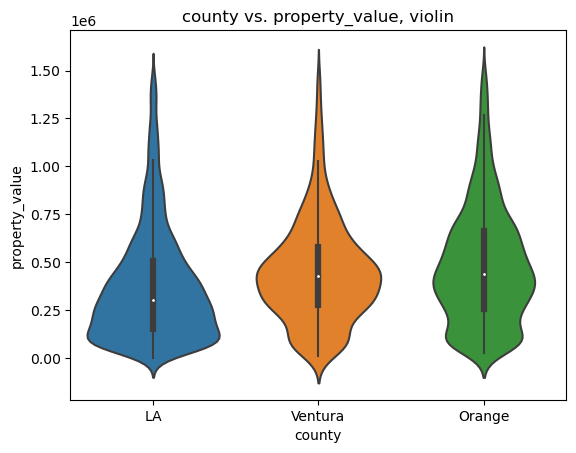

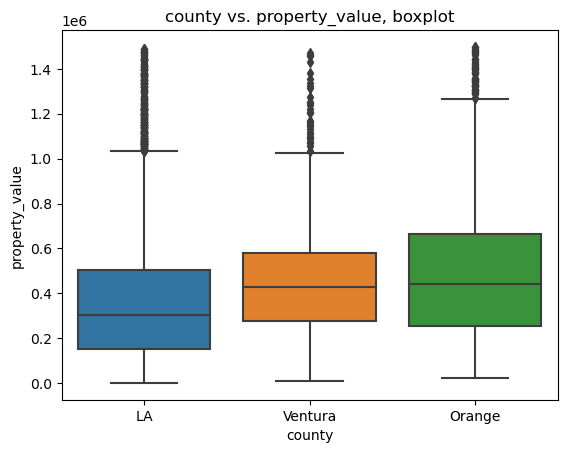

In [5]:
e.plot_categorical_and_continuous_vars(train, cont_cols, cat_cols) 

In [9]:
# make corr with default value (method=pearson) due to normal distribution of our variables
# NOTE: Misty said spearman is better for discrete variables, like say bedrooms and bathrooms
zillow_corr = train[cont_cols].corr()
zillow_corr


,bathrooms,bedrooms,squarefeet,lotsize_sqft,year,property_value
bathrooms,1.000000,0.624228,0.816963,0.250953,0.536962,0.460496
bedrooms,0.624228,1.000000,0.632519,0.188809,0.375076,0.254847
squarefeet,0.816963,0.632519,1.000000,0.357863,0.475418,0.531067
lotsize_sqft,0.250953,0.188809,0.357863,1.000000,0.083189,0.152175
year,0.536962,0.375076,0.475418,0.083189,1.000000,0.248008
property_value,0.460496,0.254847,0.531067,0.152175,0.248008,1.000000


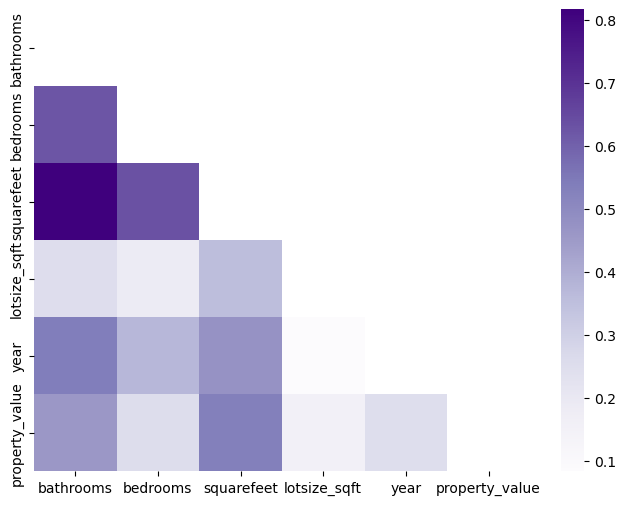

In [7]:
# Next, pass correlation matrix to sns.heatmap
plt.figure(figsize=(8,6))
sns.heatmap(zillow_corr, cmap='Purples', mask=np.triu(zillow_corr))
plt.show()

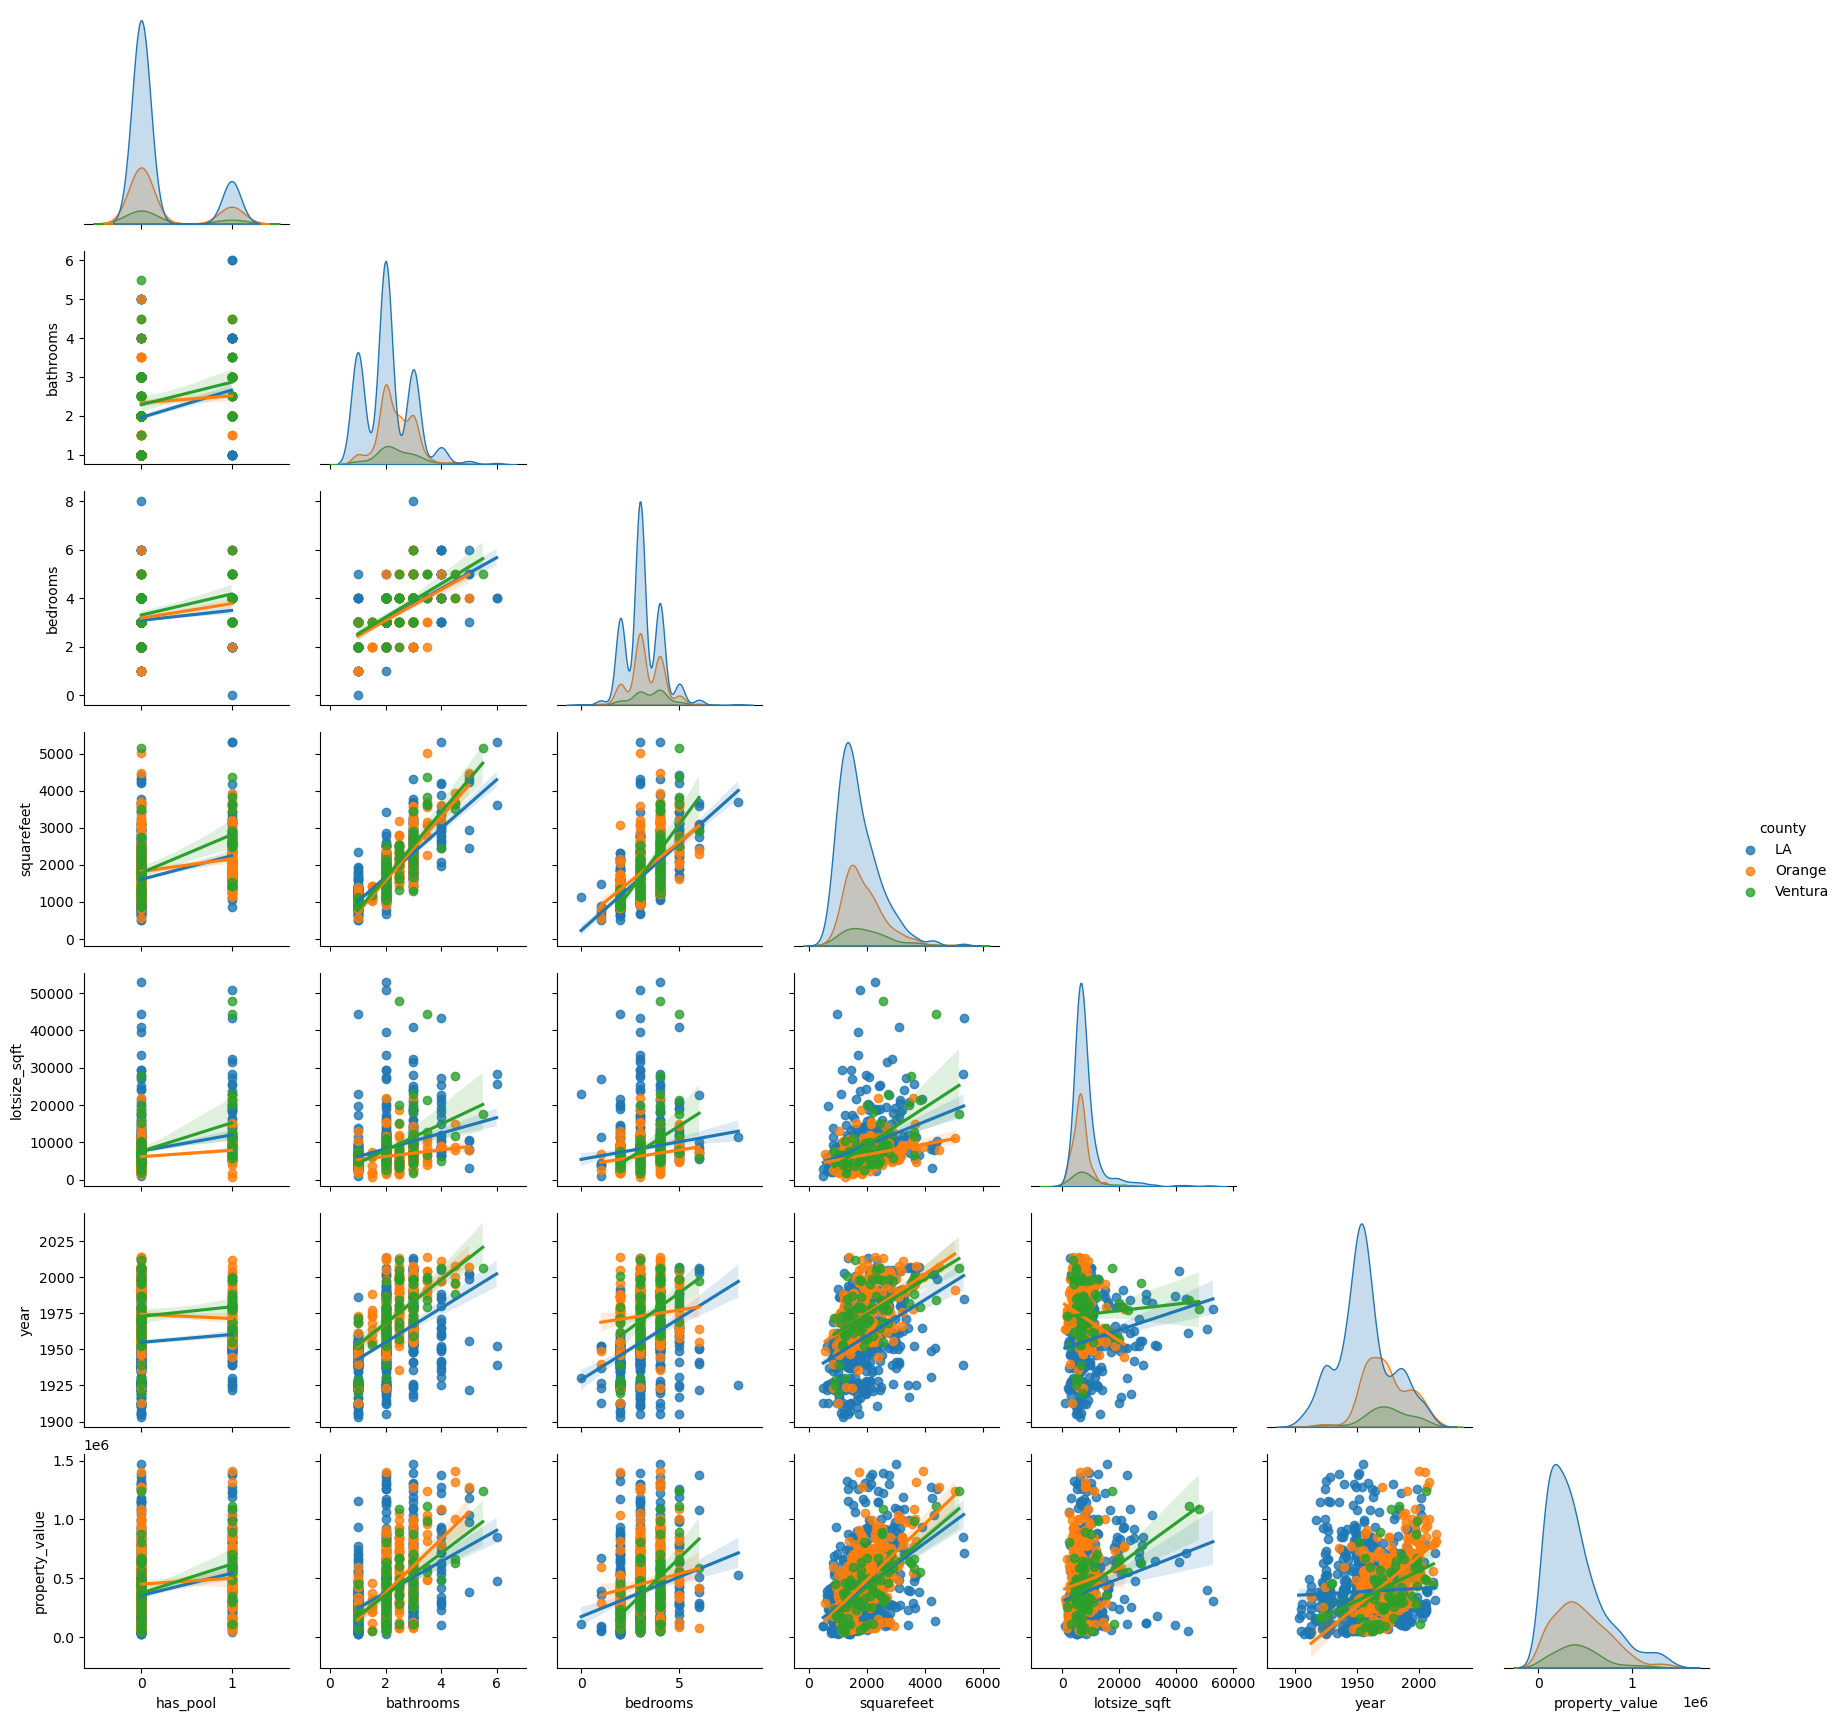

In [13]:
# if i want hue='county', i have to add county back into my cols
sns.pairplot(data=train[cat_cols + cont_cols].sample(1000), kind='reg', corner=True, hue='county')
plt.show()

## Initial hypotheses:
### - Reference correlation coefficients
#### - target hypotheses: square_feet and bathrooms are strongly correlated with property_value
#### - target hypotheses: bedrooms, year, and lotsize_sqft AND has_pool are less strongly correlated with property_value
#### - feature hypotheses: bedrooms, bathrooms, square_feet, and year are correlated with each other
#### - feature hypotheses: lotsize_sqft is correlated slightly with all but year

#### - feature: county has a low correlation if any to any other variable